In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyp
from os.path import join
import datetime as dt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lr = linear_model.LinearRegression()
from sklearn.model_selection import train_test_split


In [2]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


In [3]:
d_path = "C:\\Users\Ahmet Coskun\Desktop\CS 210\Group Project"
filename = "Fire_Incidents.csv"

df = pd.read_csv(join(d_path, filename))

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,12,19,37,44,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Incident Number,Exposure Number,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,Zipcode,...,Detector Effectiveness,Detector Failure Reason,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,Neighborhood District,Location
0,9030109,0,310 Colon Av.,04/12/2009,91020273,04/12/2009 06:09:13 PM,04/12/2009 06:13:45 PM,04/12/2009 07:23:13 PM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13067402,0,20 Lansdale Av,07/18/2013,131990117,07/18/2013 10:32:03 AM,07/18/2013 10:37:15 AM,07/18/2013 10:39:55 AM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12044490,0,7th St. / Folsom St.,05/13/2012,121340051,05/13/2012 03:55:37 AM,05/13/2012 04:01:57 AM,05/13/2012 04:05:44 AM,SF,94103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,South of Market,"(37.7767460000297, -122.407844)"
3,13033326,0,2799 Pacific Av,04/09/2013,130990286,04/09/2013 04:34:07 PM,04/09/2013 04:39:31 PM,04/09/2013 05:20:27 PM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11101416,0,Polk St. / Pine St.,11/01/2011,113050357,11/01/2011 06:07:45 PM,11/01/2011 06:10:17 PM,11/01/2011 06:11:09 PM,SF,94109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Nob Hill,"(37.7896190000297, -122.420497)"


In [5]:
df=df.filter(['Incident Date','Incident Number'])
df.head()

,Incident Date,Incident Number
0,04/12/2009,9030109
1,07/18/2013,13067402
2,05/13/2012,12044490
3,04/09/2013,13033326
4,11/01/2011,11101416


In [6]:
df.isnull().sum()

Incident Date      0
Incident Number    0
dtype: int64

In [7]:
d_path = "C:\\Users\Ahmet Coskun\Desktop\CS 210\Group Project\Weather"
filename = "pressure.csv"

df_pressure = pd.read_csv(join(d_path, filename))

In [8]:
df_pressure=df_pressure.filter(['datetime','San Francisco'])
df_pressure.rename(columns={'San Francisco' : 'Pressure'}, inplace=True)
df_pressure.head()

,datetime,Pressure
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,1009.0
2,2012-10-01 14:00:00,1009.0
3,2012-10-01 15:00:00,1009.0
4,2012-10-01 16:00:00,1009.0


In [9]:
d_path = "C:\\Users\Ahmet Coskun\Desktop\CS 210\Group Project\Weather"
filename = "humidity.csv"

df_humidity = pd.read_csv(join(d_path, filename))

In [10]:
df_humidity= df_humidity.filter(['datetime','San Francisco'])
df_humidity.rename(columns={'San Francisco' : 'Humidity'}, inplace=True)
df_humidity.head()

,datetime,Humidity
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,88.0
2,2012-10-01 14:00:00,87.0
3,2012-10-01 15:00:00,86.0
4,2012-10-01 16:00:00,85.0


In [11]:
d_path = "C:\\Users\Ahmet Coskun\Desktop\CS 210\Group Project\Weather"
filename = "temperature.csv"

df_temperature = pd.read_csv(join(d_path, filename))

In [12]:
df_temperature= df_temperature.filter(['datetime','San Francisco'])
df_temperature.rename(columns={'San Francisco' : 'Temperature'}, inplace=True)
df_temperature.head()

,datetime,Temperature
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,289.480000
2,2012-10-01 14:00:00,289.474993
3,2012-10-01 15:00:00,289.460618
4,2012-10-01 16:00:00,289.446243


In [13]:
d_path = "C:\\Users\Ahmet Coskun\Desktop\CS 210\Group Project\Weather"
filename = "weather_description.csv"

df_weather_description = pd.read_csv(join(d_path, filename))

In [14]:
df_weather_description= df_weather_description.filter(['datetime','San Francisco'])
df_weather_description.rename(columns={'San Francisco' : 'Weather Description'}, inplace=True)
df_weather_description.head()

,datetime,Weather Description
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,light rain
2,2012-10-01 14:00:00,sky is clear
3,2012-10-01 15:00:00,sky is clear
4,2012-10-01 16:00:00,sky is clear


In [15]:
d_path = "C:\\Users\Ahmet Coskun\Desktop\CS 210\Group Project\Weather"
filename = "wind_direction.csv"

df_wind_direction = pd.read_csv(join(d_path, filename))

In [16]:
df_wind_direction= df_wind_direction.filter(['datetime','San Francisco'])
df_wind_direction.rename(columns={'San Francisco' : 'Wind Direction'}, inplace=True)
df_wind_direction.head()

,datetime,Wind Direction
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,150.0
2,2012-10-01 14:00:00,147.0
3,2012-10-01 15:00:00,141.0
4,2012-10-01 16:00:00,135.0


In [17]:
d_path = "C:\\Users\Ahmet Coskun\Desktop\CS 210\Group Project\Weather"
filename = "wind_speed.csv"

df_wind_speed = pd.read_csv(join(d_path, filename))

In [18]:
df_wind_speed= df_wind_speed.filter(['datetime','San Francisco'])
df_wind_speed.rename(columns={'San Francisco' : 'Wind Speed'}, inplace=True)
df_wind_speed.head()

,datetime,Wind Speed
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,2.0
2,2012-10-01 14:00:00,2.0
3,2012-10-01 15:00:00,2.0
4,2012-10-01 16:00:00,2.0


In [19]:
df_temperature['Wind Speed']=df_wind_speed['Wind Speed']
df_temperature['Wind Direction']=df_wind_direction['Wind Direction']
df_temperature['Weather Description']=df_weather_description['Weather Description']
df_temperature['Humidity']=df_humidity['Humidity']
df_temperature['Pressure']=df_pressure['Pressure']
#df_temperature.head()
df_temperature.tail()

,datetime,Temperature,Wind Speed,Wind Direction,Weather Description,Humidity,Pressure
45248,2017-11-29 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45252,2017-11-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_temperature.dtypes

datetime                object
Temperature            float64
Wind Speed             float64
Wind Direction         float64
Weather Description     object
Humidity               float64
Pressure               float64
dtype: object

In [21]:
df_temperature['datetime'] = pd.to_datetime(df_temperature['datetime'])

In [22]:
df_temperature.dtypes

datetime               datetime64[ns]
Temperature                   float64
Wind Speed                    float64
Wind Direction                float64
Weather Description            object
Humidity                      float64
Pressure                      float64
dtype: object

In [23]:

start_date= '01-01-2014'
end_date= '29-10-2017'

In [24]:
mask = (df_temperature['datetime']>= start_date)&(df_temperature['datetime']<end_date)

In [25]:
df_temperature= df_temperature.loc[mask]
df_temperature.head()
#df_temperature.tail()

,datetime,Temperature,Wind Speed,Wind Direction,Weather Description,Humidity,Pressure
10956,2014-01-01 00:00:00,287.55,4.0,280.0,few clouds,54.0,1022.0
10957,2014-01-01 01:00:00,286.47,1.0,303.0,haze,55.0,1019.0
10958,2014-01-01 02:00:00,284.34,1.0,303.0,mist,55.0,1020.0
10959,2014-01-01 03:00:00,283.08,1.0,303.0,mist,55.0,1020.0
10960,2014-01-01 04:00:00,282.01,1.0,303.0,mist,55.0,1020.0


In [26]:
df_temperature[pd.notnull(df_temperature.index)]

,datetime,Temperature,Wind Speed,Wind Direction,Weather Description,Humidity,Pressure
10956,2014-01-01 00:00:00,287.5500,4.0,280.0,few clouds,54.0,1022.0
10957,2014-01-01 01:00:00,286.4700,1.0,303.0,haze,55.0,1019.0
10958,2014-01-01 02:00:00,284.3400,1.0,303.0,mist,55.0,1020.0
10959,2014-01-01 03:00:00,283.0800,1.0,303.0,mist,55.0,1020.0
10960,2014-01-01 04:00:00,282.0100,1.0,303.0,mist,55.0,1020.0
10961,2014-01-01 05:00:00,281.8300,1.0,303.0,mist,55.0,1020.0
10962,2014-01-01 06:00:00,280.9300,1.0,303.0,mist,55.0,1020.0
10963,2014-01-01 07:00:00,280.4400,1.0,303.0,haze,87.0,1022.0
10964,2014-01-01 08:00:00,280.1600,1.0,303.0,sky is clear,55.0,1020.0
10965,2014-01-01 09:00:00,279.7700,0.0,135.0,mist,55.0,1020.0


In [27]:
df_temperature[df_temperature["Pressure"].isnull()]

,datetime,Temperature,Wind Speed,Wind Direction,Weather Description,Humidity,Pressure
11492,2014-01-23 08:00:00,281.94,4.0,248.0,mist,94.0,NaN
44461,2017-10-28 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44462,2017-10-28 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44463,2017-10-28 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44464,2017-10-28 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44465,2017-10-28 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44466,2017-10-28 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44467,2017-10-28 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44468,2017-10-28 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44469,2017-10-28 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_temperature.isnull().sum()

datetime                0
Temperature            23
Wind Speed             24
Wind Direction         24
Weather Description    23
Humidity               82
Pressure               24
dtype: int64

In [29]:
#index2drop = df_temperature[df_temperature["Humidity"].isnull()].index
#df_temperature.drop(index2drop, inplace=True)

In [30]:
#df_temperature.isnull().sum()

In [31]:
df_temperature.isnull().sum()

datetime                0
Temperature            23
Wind Speed             24
Wind Direction         24
Weather Description    23
Humidity               82
Pressure               24
dtype: int64

In [32]:
dfnew = df_temperature.dropna(axis = 0 ,how ="any" )

In [33]:
dfnew.isnull().sum()

datetime               0
Temperature            0
Wind Speed             0
Wind Direction         0
Weather Description    0
Humidity               0
Pressure               0
dtype: int64

In [35]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'])

In [36]:
df.head()

,Incident Date,Incident Number
0,2009-04-12,9030109
1,2013-07-18,13067402
2,2012-05-13,12044490
3,2013-04-09,13033326
4,2011-11-01,11101416


In [37]:
mask2 = (df['Incident Date']>= start_date)&(df['Incident Date']<end_date)

In [38]:
df= df.loc[mask2]
df.head()

,Incident Date,Incident Number
7,2015-06-20,15065212
40,2014-01-01,14000364
356,2014-01-03,14001033
404,2014-01-14,14004871
439,2014-02-15,14015696


In [39]:
dfg = dfnew.set_index('datetime').groupby(pd.Grouper(freq='d')).mean()
dfg

,Temperature,Wind Speed,Wind Direction,Humidity,Pressure
datetime,,,,,
2014-01-01,282.431667,1.000000,273.125000,57.750000,1020.416667
2014-01-02,284.803646,0.750000,215.125000,58.041667,1019.000000
2014-01-03,284.723750,0.791667,228.750000,59.625000,1016.125000
2014-01-04,284.284997,1.090909,247.136364,56.136364,1014.045455
2014-01-05,285.466458,0.791667,153.416667,57.958333,1017.541667
2014-01-06,283.875833,0.875000,197.125000,59.916667,1021.291667
2014-01-07,284.287500,0.833333,264.000000,60.125000,1020.250000
2014-01-08,284.675396,0.750000,260.666667,67.208333,1021.083333
2014-01-09,284.426667,0.904762,219.428571,67.714286,1021.809524


In [60]:
a= df.groupby(by= 'Incident Date').count()['Incident Number']


In [59]:
df1=pd.DataFrame(a)


In [46]:
dfg['Number of Incidents']=df1['Incident Number']
dfg.head()

,Temperature,Wind Speed,wind_direction,Humidity,Pressure,Number of Incidents
datetime,,,,,,
2014-01-01,282.431667,1.000000,273.125000,57.750000,1020.416667,103
2014-01-02,284.803646,0.750000,215.125000,58.041667,1019.000000,87
2014-01-03,284.723750,0.791667,228.750000,59.625000,1016.125000,94
2014-01-04,284.284997,1.090909,247.136364,56.136364,1014.045455,86
2014-01-05,285.466458,0.791667,153.416667,57.958333,1017.541667,70


In [122]:
dfg.rename({'Number of Incidents':'Incidents',"Wind Direction" : "wind_direction","Wind Speed":"wind_speed"}, axis='columns',inplace=True)
dfg

,Temperature,wind_speed,wind_direction,Humidity,Pressure,Incidents,incident_category,Direction,temp_category,humid_category,press_category
datetime,,,,,,,,,,,
2014-01-01,282.431667,1.000000,273.125000,57.750000,1020.416667,103,4,6,0,0,2
2014-01-02,284.803646,0.750000,215.125000,58.041667,1019.000000,87,3,5,0,0,2
2014-01-03,284.723750,0.791667,228.750000,59.625000,1016.125000,94,4,5,0,0,1
2014-01-04,284.284997,1.090909,247.136364,56.136364,1014.045455,86,3,5,0,0,1
2014-01-05,285.466458,0.791667,153.416667,57.958333,1017.541667,70,1,3,1,0,2
2014-01-06,283.875833,0.875000,197.125000,59.916667,1021.291667,78,2,4,0,0,2
2014-01-07,284.287500,0.833333,264.000000,60.125000,1020.250000,83,3,6,0,0,2
2014-01-08,284.675396,0.750000,260.666667,67.208333,1021.083333,65,1,6,0,0,2
2014-01-09,284.426667,0.904762,219.428571,67.714286,1021.809524,87,3,5,0,0,2


In [82]:
def assign_class(Incidents):
    
    if Incidents>=0 and Incidents <32 :
        return 0
    elif Incidents>= 32 and Incidents<73:
        return 1
    elif Incidents>= 73 and Incidents<82:
        return 2
    elif Incidents>= 82 and Incidents<92:
        return 3
    elif Incidents>=92 and Incidents<137:
        return 4
    else:
        return 5

dfg["incident_category"] = dfg["Incidents"].apply(assign_class)

In [84]:
def assign_class(wind_direction):
    
    if wind_direction>=0 and wind_direction <22.5 :
        return 0
    elif wind_direction>= 22.5 and wind_direction<67.5:
        return 1
    elif wind_direction>=67.5 and wind_direction<112.5:
        return 2
    elif wind_direction>= 112.5 and wind_direction<157.5:
        return 3
    elif wind_direction>=157.5 and wind_direction<202.5:
        return 4
    elif wind_direction>=202.5 and wind_direction<247.5:
        return 5
    elif wind_direction>=247.5 and wind_direction<292.5:
        return 6
    elif wind_direction>=292.5 and wind_direction<337.5:
        return 7
    else:
        return 0

dfg["Direction"] = dfg["wind_direction"].apply(assign_class)

In [117]:
dfg.head()

,Temperature,Wind Speed,wind_direction,Humidity,Pressure,Incidents,incident_category,Direction,temp_category,humid_category
datetime,,,,,,,,,,
2014-01-01,282.431667,1.000000,273.125000,57.750000,1020.416667,103,4,6,0,0
2014-01-02,284.803646,0.750000,215.125000,58.041667,1019.000000,87,3,5,0,0
2014-01-03,284.723750,0.791667,228.750000,59.625000,1016.125000,94,4,5,0,0
2014-01-04,284.284997,1.090909,247.136364,56.136364,1014.045455,86,3,5,0,0
2014-01-05,285.466458,0.791667,153.416667,57.958333,1017.541667,70,1,3,1,0


In [124]:
dfg["wind_speed"].describe()

count    1397.000000
mean        2.927979
std         1.492218
min         0.375000
25%         1.750000
50%         2.791667
75%         3.791667
max        11.375000
Name: wind_speed, dtype: float64

In [119]:
def assign_class(Pressure):
    
    if Pressure>=999 and Pressure <1013 :
        return 0
    elif Pressure>=1013 and Pressure<1017:
        return 1
    elif Pressure>=1017 and Pressure<1023:
        return 2
    else:
        return 3

dfg["press_category"] = dfg["Pressure"].apply(assign_class)

In [123]:
def assign_class(wind_speed):
    
    if wind_speed>=0.37 and wind_speed <1.75 :
        return 0
    elif wind_speed>=1.75 and wind_speed<2.79:
        return 1
    elif wind_speed>=2.79 and wind_speed<3.79:
        return 2
    else:
        return 3

dfg["winds_category"] = dfg["wind_speed"].apply(assign_class)

In [114]:
def assign_class(Humidity):
    
    if Humidity>=21 and Humidity <71 :
        return 0
    elif Humidity>=71 and Humidity<78:
        return 1
    elif Humidity>=78 and Humidity<85:
        return 2
    else:
        return 3

dfg["humid_category"] = dfg["Humidity"].apply(assign_class)

In [ ]:
def assign_class(Temperature):
    
    if Temperature>=277 and Temperature <285 :
        return 0
    elif Temperature>= 285 and Temperature<288:
        return 1
    elif Temperature>= 288 and Temperature<291:
        return 2
    else:
        return 3

dfg["temp_category"] = dfg["Temperature"].apply(assign_class)

In [66]:
dfg.drop("weather_desc", axis=1, inplace=True)

In [144]:
dfdt.describe()

,incident_category,Direction,temp_category,humid_category,press_category,winds_category
count,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000
mean,2.548318,4.674302,1.626342,1.554044,1.624195,1.511811
std,1.136774,1.141434,1.077562,1.120648,1.071813,1.122528
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,5.000000,2.000000,2.000000,2.000000,2.000000
75%,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000
max,5.000000,7.000000,3.000000,3.000000,3.000000,3.000000


In [125]:
dfdt = dfg.drop(["Temperature","wind_direction","wind_speed","Humidity","Pressure","Incidents"],axis = 1)

In [146]:
Xdt = dfdt.drop("incident_category",axis = 1)
ydt = dfdt["incident_category"]

In [175]:
from sklearn.model_selection import train_test_split
X_traindt, X_testdt, y_traindt, y_testdt = train_test_split(Xdt, ydt, test_size=0.30)

In [176]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [177]:
model.fit(X_traindt, y_traindt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [180]:
model.feature_importances_


array([0.22769268, 0.10622285, 0.21718455, 0.24053594, 0.20836398])

In [181]:
dt_feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

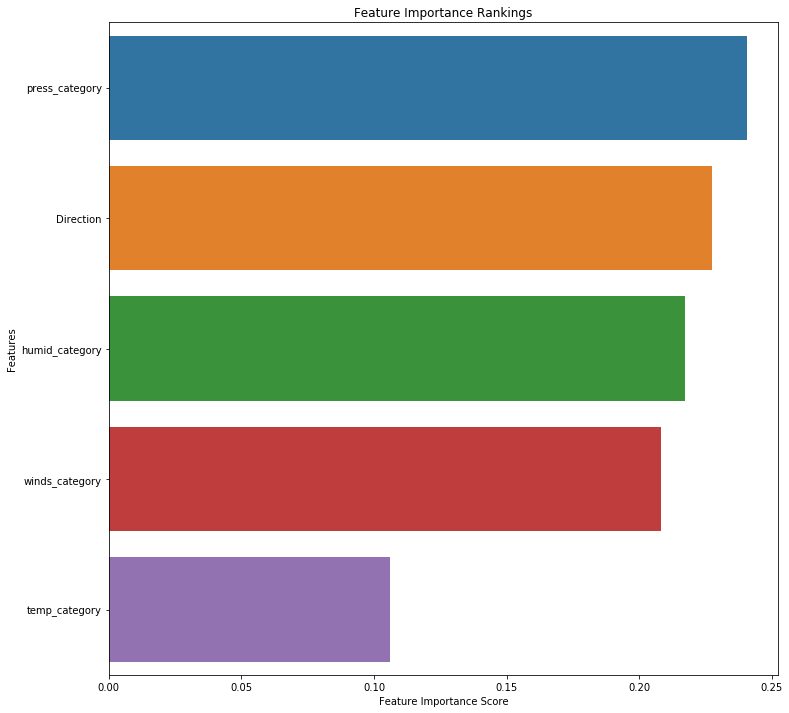

In [182]:
pyp.figure(figsize=(12, 12))
sns.barplot(x=dt_feature_importances, y=dt_feature_importances.index)

# Add labels to our graph  
pyp.xlabel('Feature Importance Score')
pyp.ylabel('Features')
pyp.title("Feature Importance Rankings")
pyp.show()

In [178]:
y_predictdt = model.predict(X_testdt)

In [179]:
from sklearn.metrics import accuracy_score

accuracy_score(y_testdt, y_predictdt)

0.28809523809523807

In [139]:
from sklearn.tree import export_graphviz 

In [142]:
export_graphviz(model, out_file ='tree2.dot')  


In [154]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

In [155]:
rf.fit(X_traindt, y_traindt)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [156]:
pred_rf = rf.predict(X_testdt)

In [158]:
from sklearn import metrics
accuracy_score(y_testdt, pred_rf)

0.30238095238095236

In [163]:
rf.feature_importances_

array([0.28320701, 0.16084922, 0.16502783, 0.21125257, 0.17966338])

In [168]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

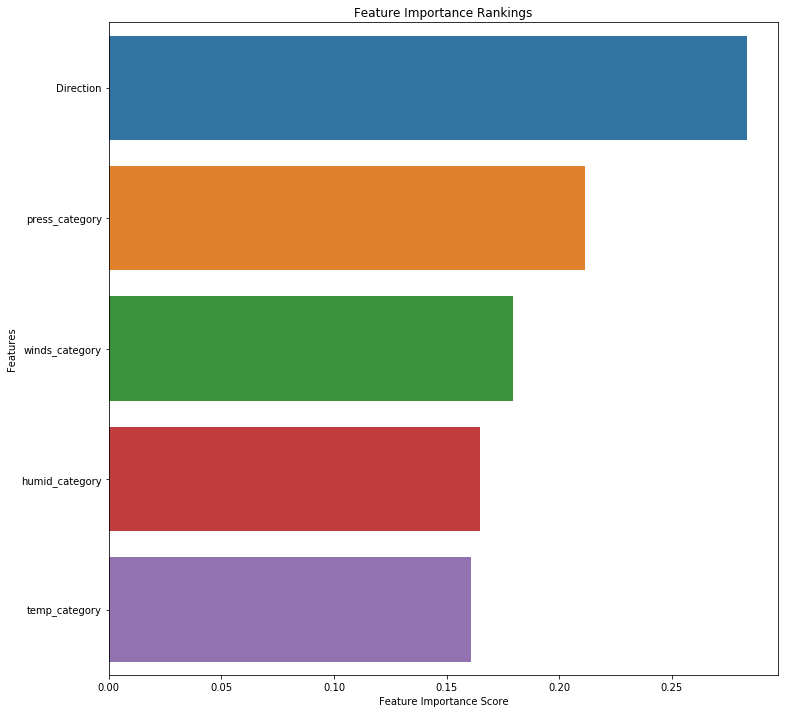

In [169]:
pyp.figure(figsize=(12, 12))
sns.barplot(x=feature_importances, y=feature_importances.index)

# Add labels to our graph  
pyp.xlabel('Feature Importance Score')
pyp.ylabel('Features')
pyp.title("Feature Importance Rankings")
pyp.show()